# Implementation of the Original Momentum and the Risk-Managed Momentum Strategies

### Based on *Momentum has its moments* by Pedro Barroso and Pedro Santa-Clara (http://docentes.fe.unl.pt/~psc/MomentumMoments.pdf)

Import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels
import matplotlib.pyplot as plt

Function for finding the WML for the unscaled momentum strategy (the selected stock universe consists of 16 NYSE stocks picked at random):

In [2]:
def WML(start, end):
    symbol_list = ['VJET', 'CRC', 'CBI', 'VIPS', 'RGR', 'DDD', 'XCO', 'FC', 'SFUN', 'NKE', 'TROX', 'DCO', 'SMI', 'CC', 'CIA', 'WOR']
    prices_df = get_pricing(symbol_list, fields='close_price', start_date=start, end_date=end)
    returns_df = prices_df.pct_change()[1:]
    cumulative_returns_df = returns_df.sum()
    difference = np.percentile(cumulative_returns_df, 90) - np.percentile(cumulative_returns_df, 10)
    return difference

Find the performance of unscaled momentum in the selected universe of stocks in the period of time from 2002-01-01 (the earliest date for which pricing data is available in the Quantopian dataset) to 2017-05-01 (two months prior to now):

In [3]:
daterange = pd.date_range('2002-01-01', '2017-05-01', freq='M')
momentum = []
for i in range(daterange.size-10):
    momentum.append(WML(daterange[i], daterange[i+10]))

Convert our calculated momentum from a list to a NumPy array to be able to access the methods within the NumPy array class:

In [6]:
momentum_np = np.array(momentum)

Get descriptive statistics for the performance of unscaled momentum:

In [34]:
des_stats = stats.describe(momentum_np)

print 'Descriptive statistics of the original momentum strategy:'
print

print 'Minimum:', des_stats[1][0]
print 'Maximum:', des_stats[1][1]
print 'Mean:', des_stats[2]
print 'Variance:', des_stats[3]
print 'Skewness:', des_stats[4]
print 'Kurtosis:', des_stats[5]

Descriptive statistics of the original momentum strategy:

Minimum: 0.157869917366
Maximum: 1.74039363856
Mean: 0.685988107391
Variance: 0.0882275628489
Skewness: 0.719612003358
Kurtosis: 0.391782131187


Plot the returns of the unscaled momentum strategy:

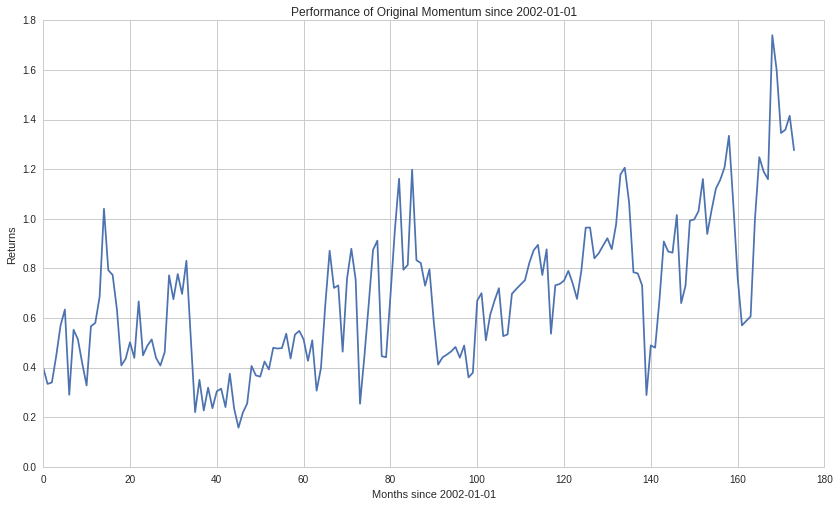

In [44]:
plt.plot(momentum_np)
plt.xlabel('Months since 2002-01-01')
plt.ylabel('Returns')
plt.title('Performance of Original Momentum since 2002-01-01');

Find the performance of scaled momentum in the same universe of stocks in the same period of time:

In [73]:
# Get the squared returns of unscaled momentum
momentum_np_sq = momentum_np**2

# Function for finding the realized variance of the returns of momentum in the previous (end-start) months
def var_forecast(start, end):
    return momentum_np_sq[start:end].sum()

In [74]:
scaled_momentum = []

for i in range(6, momentum_np.size):
   scaled_momentum.append(np.sqrt(var_forecast(i-6, i)) * momentum_np[i])

Convert our calculated momentum from a list to a NumPy array to be able to access the methods within the NumPy array class:

In [75]:
scaled_momentum_np = np.array(scaled_momentum)

Get descriptive statistics for the performance of scaled momentum:

In [76]:
descr_stats = stats.describe(scaled_momentum_np)

print 'Descriptive statistics of the risk-managed momentum strategy:'
print

print 'Minimum:', descr_stats[1][0]
print 'Maximum:', descr_stats[1][1]
print 'Mean:', descr_stats[2]
print 'Variance:', descr_stats[3]
print 'Skewness:', descr_stats[4]
print 'Kurtosis:', descr_stats[5]

Descriptive statistics of the risk-managed momentum strategy:

Minimum: 0.111809124658
Maximum: 4.90431397215
Mean: 1.30046500998
Variance: 0.921280811888
Skewness: 1.59936303847
Kurtosis: 2.99103925404


Plot the returns of the scaled momentum strategy:

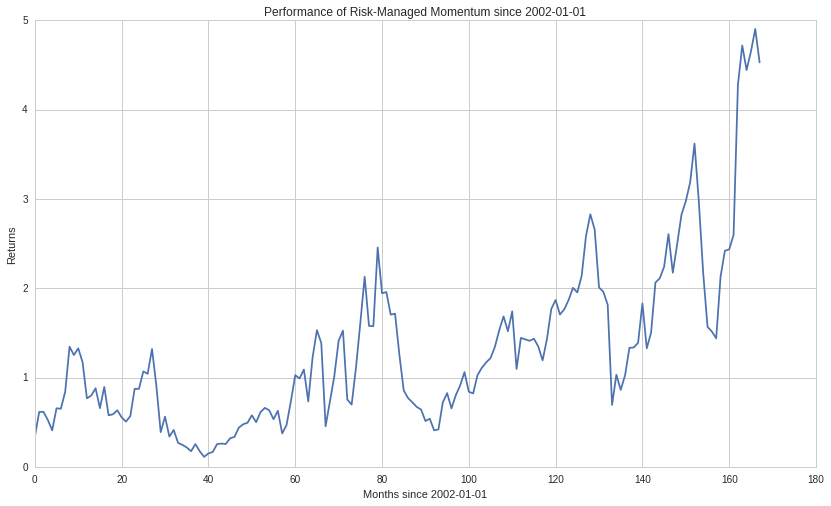

In [77]:
plt.plot(scaled_momentum_np)
plt.xlabel('Months since 2002-01-01')
plt.ylabel('Returns')
plt.title('Performance of Risk-Managed Momentum since 2002-01-01');